<a href="https://colab.research.google.com/github/VincentZuo/fin-models/blob/main/%5BFinal%5D_V16_torch_fake_attention_blended_with_unlabelled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up and read data

In [ ]:
!pip install transformers==4.17.0
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.8 MB 7.1 MB/s 
     |████████████████████████████████| 596 kB 65.1 MB/s 
     |████████████████████████████████| 880 kB 13.9 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 63.6 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=704e58bcf0efb546d4b1243d88f5092a335dd47535ba5ad713f65426aac0c002
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 5.2 MB/s 
     |███████

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
import torch
import transformers
print(transformers.__version__)
print(torch.__version__)

4.17.0
1.11.0+cu113


In [ ]:
import sys
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
read_df = pd.read_pickle("/content/gdrive/MyDrive/224U_2022/final_project_data.pkl")

In [ ]:
read_df.head()

,title,label,range,emb
0,Joseph Greenberg,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","(0, 106)","[[-0.07557425, -0.011484241, -0.07807306, 0.00..."
1,Pauline Donalda,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","(106, 127)","[[-0.057122264, 0.005889078, -0.030671664, -0...."
2,List of German football transfers summer 2017,"[0, 0, 1, 0, 0]","(127, 132)","[[-0.0032938644, -0.02310217, -0.05397396, -0...."
3,Lester Hudson,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, ...","(132, 176)","[[-0.0091192825, 0.090078354, -0.029187214, -0..."
4,Monique Ganderton,"[1, 0, 0, 0, 0, 1, 0]","(176, 183)","[[-0.090651, -0.09176681, -0.029592248, -0.062..."


In [ ]:
read_df = read_df.sample(frac=1)
read_df.head()

,title,label,range,emb
1118,Clotilde-Camille Deflandre,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","(22100, 22152)","[[-0.04171404, -0.09263573, -0.016430732, -0.0..."
1786,J. M. Wright Technical High School,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...","(36619, 36667)","[[-0.06643889, 0.028641298, 0.0606877, -0.0686..."
920,Melchior Josef Martin Knüsel,"[1, 0, 0, 1, 1, 1, 0]","(18553, 18560)","[[-0.036013246, 0.019082064, 0.0410299, 0.0683..."
95,George Jeffery,[0],"(2321, 2322)","[[-0.011592985, -0.03913107, 0.03672301, -0.09..."
1203,Apple II peripheral cards,"[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]","(24275, 24289)","[[0.026279055, -0.0536826, 0.016082687, -0.009..."


In [ ]:
MAX_SEQ_LENGTH = 128

In [ ]:
from sentence_transformers import SentenceTransformer
#Define the model
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
start_sentence = sentence_model.encode(['<s>'])
end_sentence = sentence_model.encode(['</s>'])
pad_sentence = sentence_model.encode(['<PAD>'])

start_index = 2
end_index = 3
pad_index = 4
MAX_SEQ_LENGTH=128

label_list = [0, 1, 2, 3, 4]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(pad_sentence.shape)
print(np.repeat(pad_sentence, 3, axis=0).shape)

(1, 384)
(3, 384)


In [ ]:
def pad_emb_and_label(current_emb, current_label, seq_len):
  mask = [True] * seq_len
  if len(current_emb) > seq_len-2:
    emb =  np.concatenate([start_sentence, current_emb[0:seq_len-2], end_sentence], axis=0)
    label = np.concatenate([[2], current_label[0:seq_len-2], [3]], axis=0)
    return emb, np.array(label, dtype='int64'), np.array(mask, dtype='bool')
  remainder = seq_len - len(current_emb) -2
  emb =  np.concatenate([start_sentence, current_emb, end_sentence, np.repeat(pad_sentence, remainder, axis=0)], axis=0)
  label = np.concatenate([ [2], current_label, [3], [4]*remainder ], axis=0)
  mask = [True] * (seq_len - remainder) + [False] * remainder
  return emb, np.array(label, dtype='int64'), np.array(mask, dtype='bool')

In [ ]:
current_emb_test = torch.rand(2, 384)
current_lb_test = torch.rand(2).int()
pad_emb_and_label(current_emb_test, current_lb_test, 6)

(array([[-4.4062074e-02,  3.8383719e-02,  4.8404066e-03, ...,
          3.1103401e-02,  1.5919406e-02,  7.0297201e-03],
        [ 9.4539320e-01,  9.7269917e-01,  4.9765927e-01, ...,
          2.7877468e-01,  2.4385077e-01,  7.8579247e-02],
        [ 4.9436450e-01,  4.3186504e-01,  1.1538267e-02, ...,
          9.2675370e-01,  9.6445256e-01,  9.0363866e-01],
        [-7.0660561e-02,  5.0418653e-02,  2.2698086e-02, ...,
          8.2758099e-02,  8.3503779e-04, -4.8372149e-03],
        [-1.2105960e-02, -2.5002258e-02, -5.4780357e-02, ...,
          9.6640773e-02, -2.8255633e-03,  4.8255362e-03],
        [-1.2105960e-02, -2.5002258e-02, -5.4780357e-02, ...,
          9.6640773e-02, -2.8255633e-03,  4.8255362e-03]], dtype=float32),
 array([2, 0, 0, 3, 4, 4]),
 array([ True,  True,  True,  True, False, False]))

In [ ]:
from torch.utils.data import Dataset

class WikiPandasDfDataSet(Dataset):
  def __init__(self, input_df):
    self.pandas_df = input_df

  def __getitem__(self, index):
    seq = np.array(self.pandas_df.iloc[index]["emb"], dtype='double')
    label = np.array(self.pandas_df.iloc[index]["label"], dtype='double')
    return seq, label

  def __len__(self):
      return len(self.pandas_df)

def collate_fn(batch):
    batched_seq = []
    batched_label = []
    batched_mask = []
    for seqs, labels in batch:
      try:
        local_emb, local_label, local_mask = pad_emb_and_label(seqs, labels, MAX_SEQ_LENGTH)
        batched_seq.append(local_emb)
        batched_label.append(local_label)
        batched_mask.append(local_mask)
      except Exception as e:
        print("collate_fn err:", e)
        continue
    return torch.tensor(batched_seq).float(), torch.tensor(batched_label), torch.tensor(batched_mask).bool()

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE_TRAIN = 32

dataset_train = WikiPandasDfDataSet(read_df.head(6400))
train_dataloader = DataLoader(dataset_train, batch_size=BATCH_SIZE_TRAIN, collate_fn = collate_fn, shuffle=True, drop_last=True)
dataset_val = WikiPandasDfDataSet(read_df.tail(3200))
val_dataloader = DataLoader(dataset_val, batch_size=BATCH_SIZE_TRAIN, collate_fn = collate_fn, shuffle=False, drop_last=True)

# NN Model code

In [ ]:
import torch.nn as nn
import datetime
from torch.nn import TransformerEncoderLayer
import math

In [ ]:
def _scaled_dot_product_attention(q, k, v):
    B, Nt, E = q.shape
    q = q / math.sqrt(E)
    # (B, Nt, E) x (B, E, Ns) -> (B, Nt, Ns)
    attn = torch.bmm(q, k.transpose(-2, -1))
    attn = attn.softmax(dim=-1)
    # (B, Nt, Ns) x (B, Ns, E) -> (B, Nt, E)
    output = torch.bmm(attn, v)
    return output, attn

In [ ]:
class AttentionModel(nn.Module):
  def __init__(self, nhead=4, emb_dim=384):
    super().__init__()
    self.transformer_encoder = TransformerEncoderLayer(d_model=emb_dim, nhead=nhead)

  def forward(self, seq_input):
    return self.transformer_encoder(seq_input)

class MlpGenerator(nn.Module):
    def __init__(self, noise_length, seq_length, hidden_sizes=[512], dropout_rate=0.1):
        super(MlpGenerator, self).__init__()
        self.seq_length = seq_length
        layers = []
        hidden_sizes = [noise_length] + hidden_sizes + [seq_length]
        for i in range(len(hidden_sizes)-1):
            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])
        self.layers = nn.Sequential(*layers)

    def forward(self, noise, seq_input):
        q = self.layers(noise)
        output, _ = _scaled_dot_product_attention(q, q, seq_input)
        return output

class LstmDiscriminatorModel(nn.Module):
  def __init__(self, hidden_dim, nhead=4, emb_dim=384):
    super().__init__()
    self.hidden_dim = hidden_dim
    self.lstm = nn.LSTM(emb_dim, self.hidden_dim, batch_first=True, bidirectional=True)
    self.linear_layer = nn.Linear(self.hidden_dim*2, 5)
    self.adv_layer = nn.Linear(self.hidden_dim*2, 1)
    self.softmax = nn.LogSoftmax(dim=1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, seq_input):
    outputs, (hn, cn) = self.lstm(seq_input)
    linear_output = self.linear_layer(outputs)
    adv_output = self.sigmoid(self.adv_layer(torch.reshape(hn, [outputs.shape[0], 2*self.hidden_dim])))
    return self.softmax(linear_output), adv_output

In [ ]:
def reshape_for_loss(preds, labels):
  preds_reshape = torch.reshape(preds, [preds.shape[0] * preds.shape[1], preds.shape[2]])
  labels_reshape = torch.reshape(labels, [labels.shape[0] * preds.shape[1]])
  return preds_reshape, labels_reshape

def reshape_loss(loss, batch_size, seq_len):
  return torch.reshape(loss, [batch_size, seq_len])

import torch.nn.functional as F

def fixed_sel_mask(batch_size, prob):
  ones_size = int(batch_size * prob)
  mask_local = [1] * ones_size + [0] * (batch_size - ones_size)
  return torch.tensor(mask_local).bool()

In [ ]:
fixed_sel_mask(10, 0.5)

tensor([ True,  True,  True,  True,  True, False, False, False, False, False])

In [ ]:
test_noise_length = 512
test_seq_length = 128
test_batch_size= 7
test_hidden_size = 256
test_criterion = torch.nn.BCELoss()
test_sup_criterion = torch.nn.CrossEntropyLoss(ignore_index=4, reduction='none')

fake_seqs_batches = torch.rand(test_batch_size, test_seq_length, 384)
fake_lbs_batches = torch.randint(2, (test_batch_size, test_seq_length))
fake_lbs_mask = torch.randint(2, (test_batch_size,)).bool()
noise_test = torch.zeros(fake_seqs_batches.shape[0], test_seq_length, test_noise_length).uniform_(0, 1)

model_test_ = AttentionModel()
gen_test_ = MlpGenerator(test_noise_length, seq_length=test_seq_length)
disc_test = LstmDiscriminatorModel(hidden_dim=test_hidden_size)

test_vec_post_model = model_test_(fake_seqs_batches)
test_vec_post_disc, test_adv_post_disc = disc_test(test_vec_post_model)
print(test_vec_post_disc.shape, test_adv_post_disc.shape)

test_vec_post_gen = gen_test_(noise_test, fake_seqs_batches)
test_vec_post_disc, test_gen_adv_post_disc = disc_test(test_vec_post_gen)
print(test_vec_post_disc.shape, test_gen_adv_post_disc.shape)

test_unsupervised_labels = torch.Tensor([1, 0]).to(torch.float32).repeat(test_batch_size, 1)
test_unsp_pred = torch.concat([test_adv_post_disc, test_gen_adv_post_disc], dim=1)
print(test_unsp_pred)
test_criterion(test_unsp_pred, test_unsupervised_labels)

resh_pred_test, resh_label_test = reshape_for_loss(test_vec_post_disc, fake_lbs_batches)
loss_non_masked = reshape_loss(test_sup_criterion(resh_pred_test, resh_label_test), test_batch_size, test_seq_length)
loss_non_masked = torch.mean(loss_non_masked, dim=-1)
masked_loss = torch.masked_select(loss_non_masked, fake_lbs_mask)
masked_loss
masked_loss_count = masked_loss.type(torch.float32).numel()

supervised_loss = 0
if masked_loss_count > 0:
  supervised_loss = torch.div(torch.sum(masked_loss), masked_loss_count)

supervised_loss

torch.Size([7, 128, 5]) torch.Size([7, 1])
torch.Size([7, 128, 5]) torch.Size([7, 1])
tensor([[0.4964, 0.4934],
        [0.4758, 0.4936],
        [0.4492, 0.4919],
        [0.5110, 0.5021],
        [0.5450, 0.4943],
        [0.5313, 0.4921],
        [0.5245, 0.4924]], grad_fn=<CatBackward0>)


tensor(1.6095, grad_fn=<DivBackward0>)

# Training loop code

In [ ]:
from tqdm import tqdm
from transformers import AdamW
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
LEARING_RATE = 0.001
HIDDEN_DIM_SIZE = 256
NUM_EPOCS = 10
NOISE_LENGTH = 64
DROP_PROB = 0.5

attn_model_ = AttentionModel()
gen_model_ = MlpGenerator(noise_length=NOISE_LENGTH, seq_length=MAX_SEQ_LENGTH)
disc_model_ = LstmDiscriminatorModel(hidden_dim=HIDDEN_DIM_SIZE)

attn_model_.to(device)
gen_model_.to(device)
disc_model_.to(device)

attn_opt = AdamW(attn_model_.parameters(),lr = LEARING_RATE)
gen_opt = AdamW(gen_model_.parameters(),lr = LEARING_RATE)
disc_opt = AdamW(disc_model_.parameters(),lr = LEARING_RATE)

train_losses = []
valid_losses = []
accuracy_list = []
f1_list = []

unsup_lbs_mask = fixed_sel_mask(BATCH_SIZE_TRAIN, prob=DROP_PROB).to(device)


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from functools import reduce
def train(train_dataloader, noise_length=64):
  attn_model_.train()
  gen_model_.train()
  disc_model_.train()
  sup_loss, unsup_loss = 0, 0
  step = 0
  criterion = torch.nn.CrossEntropyLoss(ignore_index=4, reduction='none')
  adv_criterion = torch.nn.BCELoss()

  # iterate over batches
  for batch in tqdm(train_dataloader):
      sequences, labels, mask = batch[0].to(device), batch[1].to(device), batch[2].to(device)
      attn_model_.zero_grad()        
      gen_model_.zero_grad()        
      disc_model_.zero_grad()        

      real_post_model = attn_model_(sequences)
      real_post_disc, real_adv = disc_model_(real_post_model)

      noise_batch = torch.zeros(sequences.shape[0], sequences.shape[1], noise_length).uniform_(0, 1).to(device)

      fake_post_gen = gen_model_(noise_batch, sequences)
      fake_post_disc, fake_adv = disc_model_(fake_post_gen)

      resh_pred, resh_label = reshape_for_loss(real_post_disc, labels)
      supervised_loss = criterion(resh_pred.to(device), resh_label.to(torch.int64).to(device))
      loss_non_masked = reshape_loss(supervised_loss, sequences.shape[0], sequences.shape[1])
      loss_non_masked = torch.mean(loss_non_masked, dim=-1)
      masked_loss = torch.masked_select(loss_non_masked, unsup_lbs_mask)
      masked_loss
      masked_loss_count = masked_loss.type(torch.float32).numel()

      supervised_loss = 0
      if masked_loss_count > 0:
        supervised_loss = torch.div(torch.sum(masked_loss), masked_loss_count)

      unsupervised_labels = torch.Tensor([1, 0]).to(torch.float32).repeat(sequences.shape[0], 1)
      unsupervised_predictions = torch.concat([real_adv, fake_adv], dim=1).to(torch.float32)
      unsupervised_loss = adv_criterion(unsupervised_predictions.to(device), unsupervised_labels.to(device))

      attn_opt.zero_grad()
      gen_opt.zero_grad()
      disc_opt.zero_grad()

      supervised_loss.backward(retain_graph=True)
      unsupervised_loss.backward()

      torch.nn.utils.clip_grad_norm_(gen_model_.parameters(), 1.0)
      torch.nn.utils.clip_grad_norm_(disc_model_.parameters(), 1.0)
      torch.nn.utils.clip_grad_norm_(attn_model_.parameters(), 1.0)

      attn_opt.step()
      gen_opt.step()
      disc_opt.step()
      
      sup_loss += supervised_loss.item()
      unsup_loss += unsupervised_loss.item()
      # progress update after every 100 batches.
      if step % 50 == 0 and not step == 0:
          print('Step', step, " of ",len(train_dataloader), " sup loss:" , supervised_loss.item(), "unsup loss" , unsupervised_loss.item())
          torch.cuda.empty_cache()
      step+=1
  # avg_train loss
  return sup_loss/ step, unsup_loss/ step

def evaluate(dev_dataloader):
  print("\nEvaluating...")
  # deactivate dropout layers
  attn_model_.eval()
  disc_model_.eval()
  sup_loss = 0
  eval_preds = []
  eval_labels = []
  curr_examples = 0
  criterion = torch.nn.CrossEntropyLoss(ignore_index=4)
  # iterate over batches
  step = 0
  for batch in tqdm(dev_dataloader):
    sequences, labels, mask = batch[0].to(device), batch[1].to(device), batch[2].to(device)
    curr_examples += len(labels)
    # deactivate autograd
    with torch.no_grad():
    # model predictions
        preds, _ = disc_model_(attn_model_(sequences))
        preds_reshape = torch.reshape(preds, [preds.shape[0] * preds.shape[1], preds.shape[2]])
        labels_reshape = torch.reshape(labels, [labels.shape[0] * preds.shape[1]])
        loss = criterion(preds_reshape, labels_reshape.to(torch.int64))
        sup_loss += loss.item()
        eval_preds += torch.argmax(preds.detach().cpu(), dim=-1).numpy().flatten().tolist()
        eval_labels += labels.detach().cpu().numpy().flatten().tolist()
    step+=1
  # compute the validation loss of the epoch
  avg_loss = sup_loss / step 

  return avg_loss, eval_preds, eval_labels

In [ ]:
for epoch in range(NUM_EPOCS):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, NUM_EPOCS))
    
    #train model
    train_loss = train(train_dataloader)
    
    #evaluate model
    valid_loss, e_pred, e_label = evaluate(val_dataloader)

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    # accuracy_list.append(accuracy)
    # f1_list.append(valid_f1)

    print('Train loss:', train_loss, 'Val loss:', valid_loss)

    labels_bool = [ elem >0 for elem in e_label]
    preds_bool = [elem >0 for elem in e_pred]
    accuracy = accuracy_score(labels_bool, preds_bool)
    valid_f1 = f1_score(labels_bool, preds_bool,average="macro")
    print('Accuracy:', accuracy, 'F1:', valid_f1)
    accuracy_list.append(accuracy)
    f1_list.append(valid_f1)



 Epoch 1 / 10


 26%|██▌       | 51/200 [00:14<00:42,  3.53it/s]

Step 50  of  200  sup loss: 0.0640435516834259 unsup loss 0.0001281228760490194


 50%|█████     | 101/200 [00:28<00:27,  3.58it/s]

Step 100  of  200  sup loss: 0.10701926797628403 unsup loss 8.62654997035861e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.60it/s]

Step 150  of  200  sup loss: 0.06624212861061096 unsup loss 6.241736991796643e-05


100%|██████████| 200/200 [00:55<00:00,  3.60it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]


Train loss: (0.0971330532990396, 0.025200443839603393) Val loss: 0.5588763508200646
Accuracy: 0.9382861328125 F1: 0.7989301409282376

 Epoch 2 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.61it/s]

Step 50  of  200  sup loss: 0.10810650885105133 unsup loss 4.2851854232139885e-05


 50%|█████     | 101/200 [00:28<00:27,  3.58it/s]

Step 100  of  200  sup loss: 0.07098884880542755 unsup loss 3.604495577747002e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.59it/s]

Step 150  of  200  sup loss: 0.04969046264886856 unsup loss 3.494537668302655e-05


100%|██████████| 200/200 [00:55<00:00,  3.60it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.03it/s]


Train loss: (0.0800925949588418, 5.7442170018475735e-05) Val loss: 0.5457748100161552
Accuracy: 0.95007568359375 F1: 0.8729011486457608

 Epoch 3 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.57it/s]

Step 50  of  200  sup loss: 0.15763717889785767 unsup loss 2.4187222152249888e-05


 50%|█████     | 101/200 [00:27<00:27,  3.59it/s]

Step 100  of  200  sup loss: 0.0884886309504509 unsup loss 2.8115295208408497e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.57it/s]

Step 150  of  200  sup loss: 0.0694509893655777 unsup loss 1.9263834474259056e-05


100%|██████████| 200/200 [00:55<00:00,  3.61it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]


Train loss: (0.07660086791496724, 5.2427682758207086e-05) Val loss: 0.48583275467157366
Accuracy: 0.954560546875 F1: 0.87552890077726

 Epoch 4 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.60it/s]

Step 50  of  200  sup loss: 0.059014514088630676 unsup loss 1.497314042353537e-05


 50%|█████     | 101/200 [00:27<00:27,  3.55it/s]

Step 100  of  200  sup loss: 0.11779096722602844 unsup loss 2.287039387738332e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.60it/s]

Step 150  of  200  sup loss: 0.05320362746715546 unsup loss 1.559339216328226e-05


100%|██████████| 200/200 [00:55<00:00,  3.61it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.05it/s]


Train loss: (0.07183275076560676, 1.5955060857777424e-05) Val loss: 0.47005470007658007
Accuracy: 0.94689453125 F1: 0.8648090213004722

 Epoch 5 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.58it/s]

Step 50  of  200  sup loss: 0.058366559445858 unsup loss 1.4268063750932924e-05


 50%|█████     | 101/200 [00:28<00:28,  3.52it/s]

Step 100  of  200  sup loss: 0.038983460515737534 unsup loss 1.6710950148990378e-05


 76%|███████▌  | 151/200 [00:41<00:13,  3.56it/s]

Step 150  of  200  sup loss: 0.044713057577610016 unsup loss 1.8403499780106358e-05


100%|██████████| 200/200 [00:55<00:00,  3.60it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.00it/s]


Train loss: (0.07085699062794447, 1.5957267382873397e-05) Val loss: 0.483331415951252
Accuracy: 0.9441796875 F1: 0.8608185917704575

 Epoch 6 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.59it/s]

Step 50  of  200  sup loss: 0.08572377264499664 unsup loss 8.571943908464164e-06


 50%|█████     | 101/200 [00:27<00:27,  3.59it/s]

Step 100  of  200  sup loss: 0.10760785639286041 unsup loss 9.209068593918346e-06


 76%|███████▌  | 151/200 [00:41<00:13,  3.58it/s]

Step 150  of  200  sup loss: 0.045680999755859375 unsup loss 1.623038770048879e-05


100%|██████████| 200/200 [00:55<00:00,  3.62it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.02it/s]


Train loss: (0.07179488903842866, 1.5790865179496906e-05) Val loss: 0.4740710896253586
Accuracy: 0.946552734375 F1: 0.857034067258541

 Epoch 7 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.56it/s]

Step 50  of  200  sup loss: 0.0831884890794754 unsup loss 1.2294780390220694e-05


 50%|█████     | 101/200 [00:28<00:27,  3.57it/s]

Step 100  of  200  sup loss: 0.06661965698003769 unsup loss 8.081156920525245e-06


 76%|███████▌  | 151/200 [00:42<00:13,  3.59it/s]

Step 150  of  200  sup loss: 0.049189381301403046 unsup loss 7.068774721119553e-06


100%|██████████| 200/200 [00:55<00:00,  3.60it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.04it/s]


Train loss: (0.06937022947706283, 9.905206536586774e-06) Val loss: 0.48393370389938356
Accuracy: 0.89347412109375 F1: 0.7648264743422291

 Epoch 8 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.59it/s]

Step 50  of  200  sup loss: 0.09970659762620926 unsup loss 1.5426949175889604e-05


 50%|█████     | 101/200 [00:28<00:27,  3.58it/s]

Step 100  of  200  sup loss: 0.08748584985733032 unsup loss 6.942178515600972e-06


 76%|███████▌  | 151/200 [00:41<00:13,  3.57it/s]

Step 150  of  200  sup loss: 0.02786405198276043 unsup loss 1.172178872366203e-05


100%|██████████| 200/200 [00:55<00:00,  3.60it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  7.99it/s]


Train loss: (0.06628753536380827, 8.633667312096804e-06) Val loss: 0.4826760631799698
Accuracy: 0.942568359375 F1: 0.854525148681377

 Epoch 9 / 10


 26%|██▌       | 51/200 [00:14<00:41,  3.59it/s]

Step 50  of  200  sup loss: 0.05679570883512497 unsup loss 6.366572961269412e-06


 50%|█████     | 101/200 [00:27<00:27,  3.56it/s]

Step 100  of  200  sup loss: 0.07406315207481384 unsup loss 7.2617085606907494e-06


 76%|███████▌  | 151/200 [00:41<00:13,  3.57it/s]

Step 150  of  200  sup loss: 0.08760295808315277 unsup loss 7.64828837418463e-06


100%|██████████| 200/200 [00:55<00:00,  3.61it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]


Train loss: (0.06336949856951833, 7.7335354853858e-06) Val loss: 0.4870766109228134
Accuracy: 0.9355517578125 F1: 0.836786583258804

 Epoch 10 / 10


 26%|██▌       | 51/200 [00:14<00:42,  3.53it/s]

Step 50  of  200  sup loss: 0.06293165683746338 unsup loss 4.428454758453881e-06


 50%|█████     | 101/200 [00:28<00:27,  3.58it/s]

Step 100  of  200  sup loss: 0.0546436682343483 unsup loss 8.885087481758092e-06


 76%|███████▌  | 151/200 [00:41<00:13,  3.57it/s]

Step 150  of  200  sup loss: 0.03677593544125557 unsup loss 6.404803571058437e-06


100%|██████████| 200/200 [00:55<00:00,  3.60it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  8.04it/s]


Train loss: (0.05809568879194558, 6.443367005886103e-06) Val loss: 0.4911905345320702
Accuracy: 0.9039111328125 F1: 0.7814429843942295


In [ ]:
sup_train_losses = [item[0] for item in train_losses]
unsup_train_losses = [item[1] for item in train_losses]
plot_df = pd.DataFrame(list(zip(sup_train_losses, valid_losses, unsup_train_losses)),
               columns =['train', 'validation', 'unsup'])

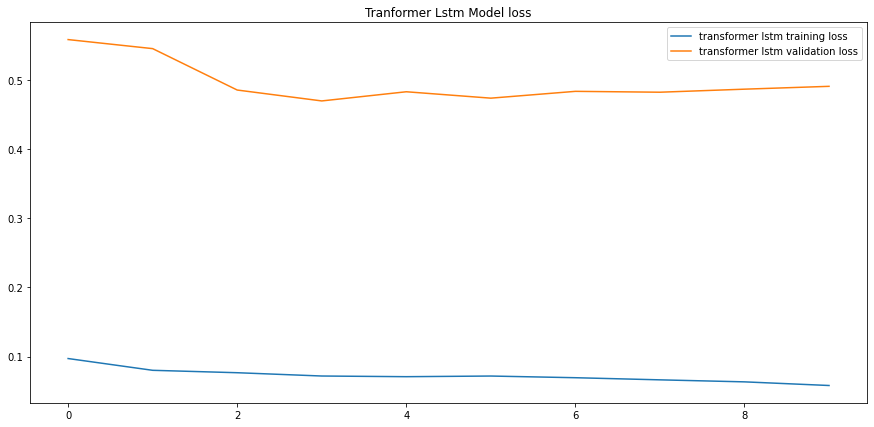

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
(plot_df['train']).plot(label = 'transformer lstm training loss', figsize = (15,7))
(plot_df['validation']).plot(label = 'transformer lstm validation loss', figsize = (15,7))
plt.title('Tranformer Lstm Model loss')
plt.legend()

In [ ]:
print("accuracy_list", accuracy_list)
print("f1_list", f1_list)

accuracy_list [0.9382861328125, 0.95007568359375, 0.954560546875, 0.94689453125, 0.9441796875, 0.946552734375, 0.89347412109375, 0.942568359375, 0.9355517578125, 0.9039111328125]
f1_list [0.7989301409282376, 0.8729011486457608, 0.87552890077726, 0.8648090213004722, 0.8608185917704575, 0.857034067258541, 0.7648264743422291, 0.854525148681377, 0.836786583258804, 0.7814429843942295]
